<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Evaluating K-Means Clusters with the Iris Dataset

---

Below you will practice using K-Means clustering and the various evaluation strategies we covered on the famous Iris dataset.

<h1>Lab Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-and-format-the-data" data-toc-modified-id="Import-and-format-the-data-1">Import and format the data</a></span></li><li><span><a href="#Plot-the-data-to-visually-estimate-the-correct-number-of-clusters" data-toc-modified-id="Plot-the-data-to-visually-estimate-the-correct-number-of-clusters-2">Plot the data to visually estimate the correct number of clusters</a></span></li><li><span><a href="#Rescale-the-data-if-necessary" data-toc-modified-id="Rescale-the-data-if-necessary-3">Rescale the data if necessary</a></span></li><li><span><a href="#Cluster-the-data-using-K-Means" data-toc-modified-id="Cluster-the-data-using-K-Means-4">Cluster the data using K-Means</a></span></li><li><span><a href="#Check-the-centroids-and-plot-them-along-two-of-the-features" data-toc-modified-id="Check-the-centroids-and-plot-them-along-two-of-the-features-5">Check the centroids and plot them along two of the features</a></span></li><li><span><a href="#Compute-the-silhouette-score-for-your-clusters" data-toc-modified-id="Compute-the-silhouette-score-for-your-clusters-6">Compute the silhouette score for your clusters</a></span></li><li><span><a href="#Plot-the-silhouette-score-for-K-=-2,3,4,5,6,7,8" data-toc-modified-id="Plot-the-silhouette-score-for-K-=-2,3,4,5,6,7,8-7">Plot the silhouette score for K = 2,3,4,5,6,7,8</a></span></li><li><span><a href="#Plot-the-inertia-score-for-the-different-K-clusters" data-toc-modified-id="Plot-the-inertia-score-for-the-different-K-clusters-8">Plot the inertia score for the different K clusters</a></span></li><li><span><a href="#Fit-K-Means-with-3-clusters-and-pull-out-the-cluster-labels.-Pull-out-the-true-labels-as-well." data-toc-modified-id="Fit-K-Means-with-3-clusters-and-pull-out-the-cluster-labels.-Pull-out-the-true-labels-as-well.-9">Fit K-Means with 3 clusters and pull out the cluster labels. Pull out the true labels as well.</a></span></li><li><span><a href="#Calculate-the-completeness,-homogeneity-and-V-measure-scores-comparing-cluster-and-true-labels" data-toc-modified-id="Calculate-the-completeness,-homogeneity-and-V-measure-scores-comparing-cluster-and-true-labels-10">Calculate the completeness, homogeneity and V measure scores comparing cluster and true labels</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score, homogeneity_completeness_v_measure, v_measure_score

### Import and format the data

- Use `sklearn.datasets.load_iris()`

In [3]:
iris = load_iris()

In [4]:
X = pd.DataFrame(iris.data)
X.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
y = iris.target

### Plot the data to visually estimate the correct number of clusters

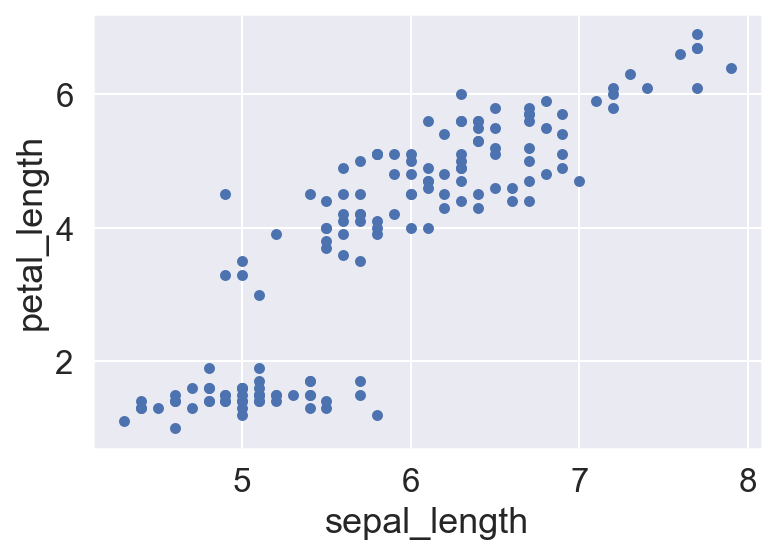

In [5]:
X.plot(kind='scatter', x='sepal_length', y='petal_length', c='b')
plt.show()

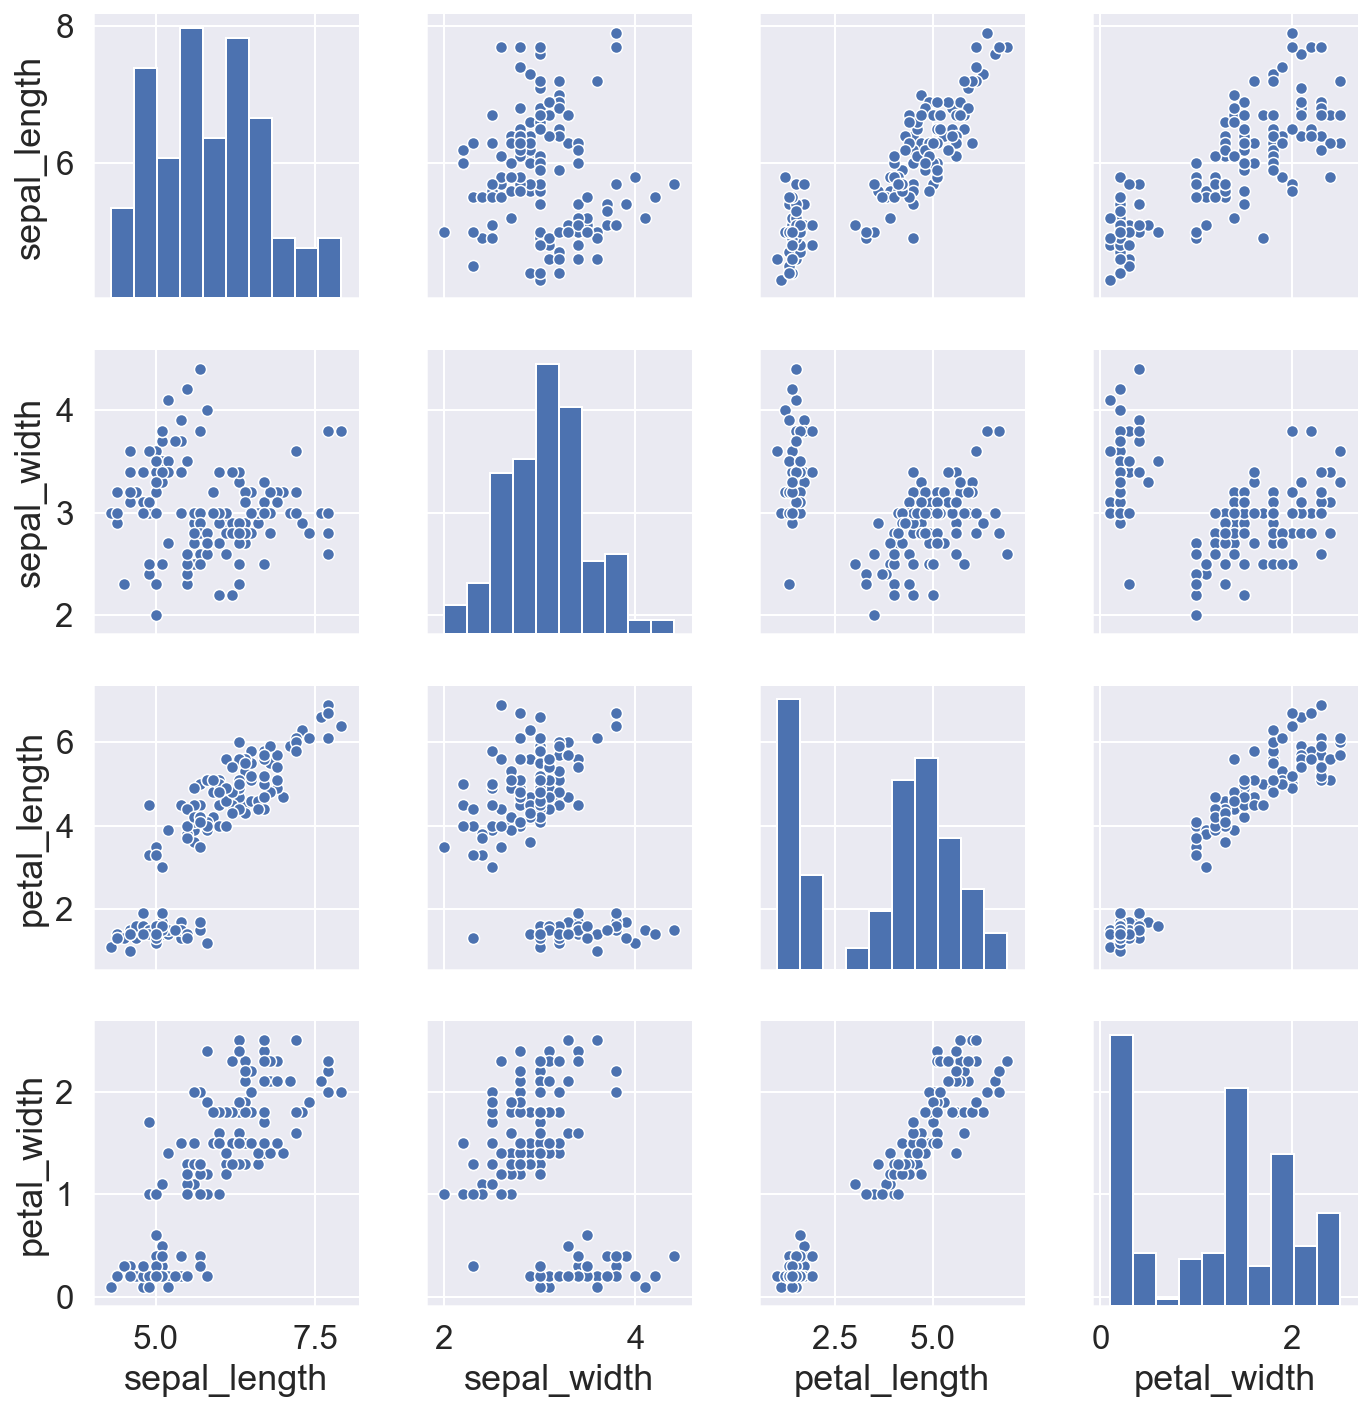

In [6]:
sns.pairplot(X)
plt.show()

### Rescale the data if necessary

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
Xstd = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

### Cluster the data using K-Means

- Select a number of clusters of your choice based on your visual analysis above.
- Compute the labels and centroids.

In [9]:
# lets say I choose K=4
k = 2
kmeans = KMeans(n_clusters=k)
kmeans.fit(Xstd)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

### Check the centroids and plot them along two of the features

How did your clustering perform?

Bonus: Color according to cluster labels and choose different symbols for each true class label.

In [11]:
markermap = np.array(['o', 'd', 'v', '+'])
colormap = np.array(['r', 'b', 'g'])


0 0 o
1 1 d


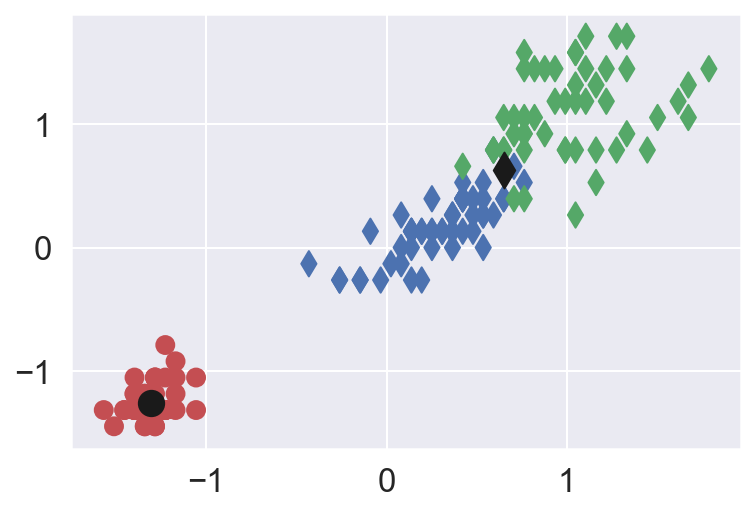

In [12]:
fig, ax = plt.subplots()

for i, (label, marker) in enumerate(zip(np.unique(labels), markermap)):
    print(i, label, marker)
    ax.scatter(Xstd[labels == label].petal_length, Xstd[labels == label].petal_width,
               c=colormap[y[labels == label]], marker=marker, s=80)
    ax.scatter([centroids[i, 2]], [centroids[i, 3]],
               c='k', marker=marker, s=160)

plt.show()

### Compute the silhouette score for your clusters

What does the score indicate?

In [13]:
silhouette_score(X, labels, metric='euclidean')

0.6867350732769776

In [14]:
# The score is positive (though not 1.), indicating that there is decent separation
# and coherence with 4 clusters.

### Plot the silhouette score for K = 2,3,4,5,6,7,8

You will need to fit a new model for each one. You can standardize your data before iterating through the clusters or not, up to you.

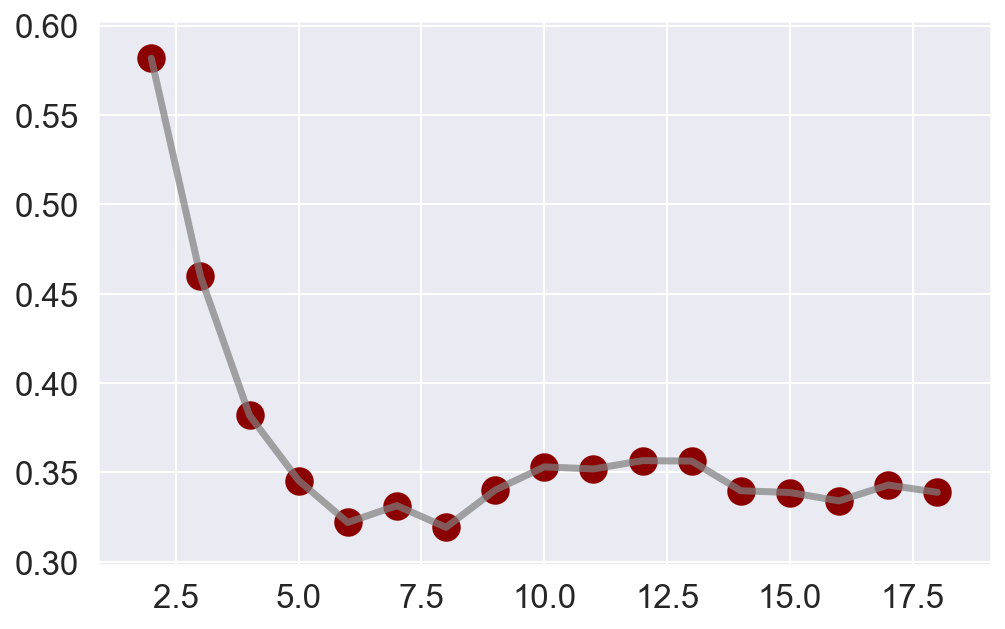

In [15]:
sils = []
k_values = range(2, 19)
for k in k_values:
    km = KMeans(n_clusters=k)
    km.fit(Xstd)
    sils.append(silhouette_score(Xstd, km.labels_, metric='euclidean'))

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(k_values, sils, c='grey', lw=3.5, alpha=0.7)
ax.scatter(k_values, sils, c='darkred', s=175)
plt.show()

In [16]:
from matplotlib.colors import ListedColormap
from scikitplot.metrics import plot_silhouette

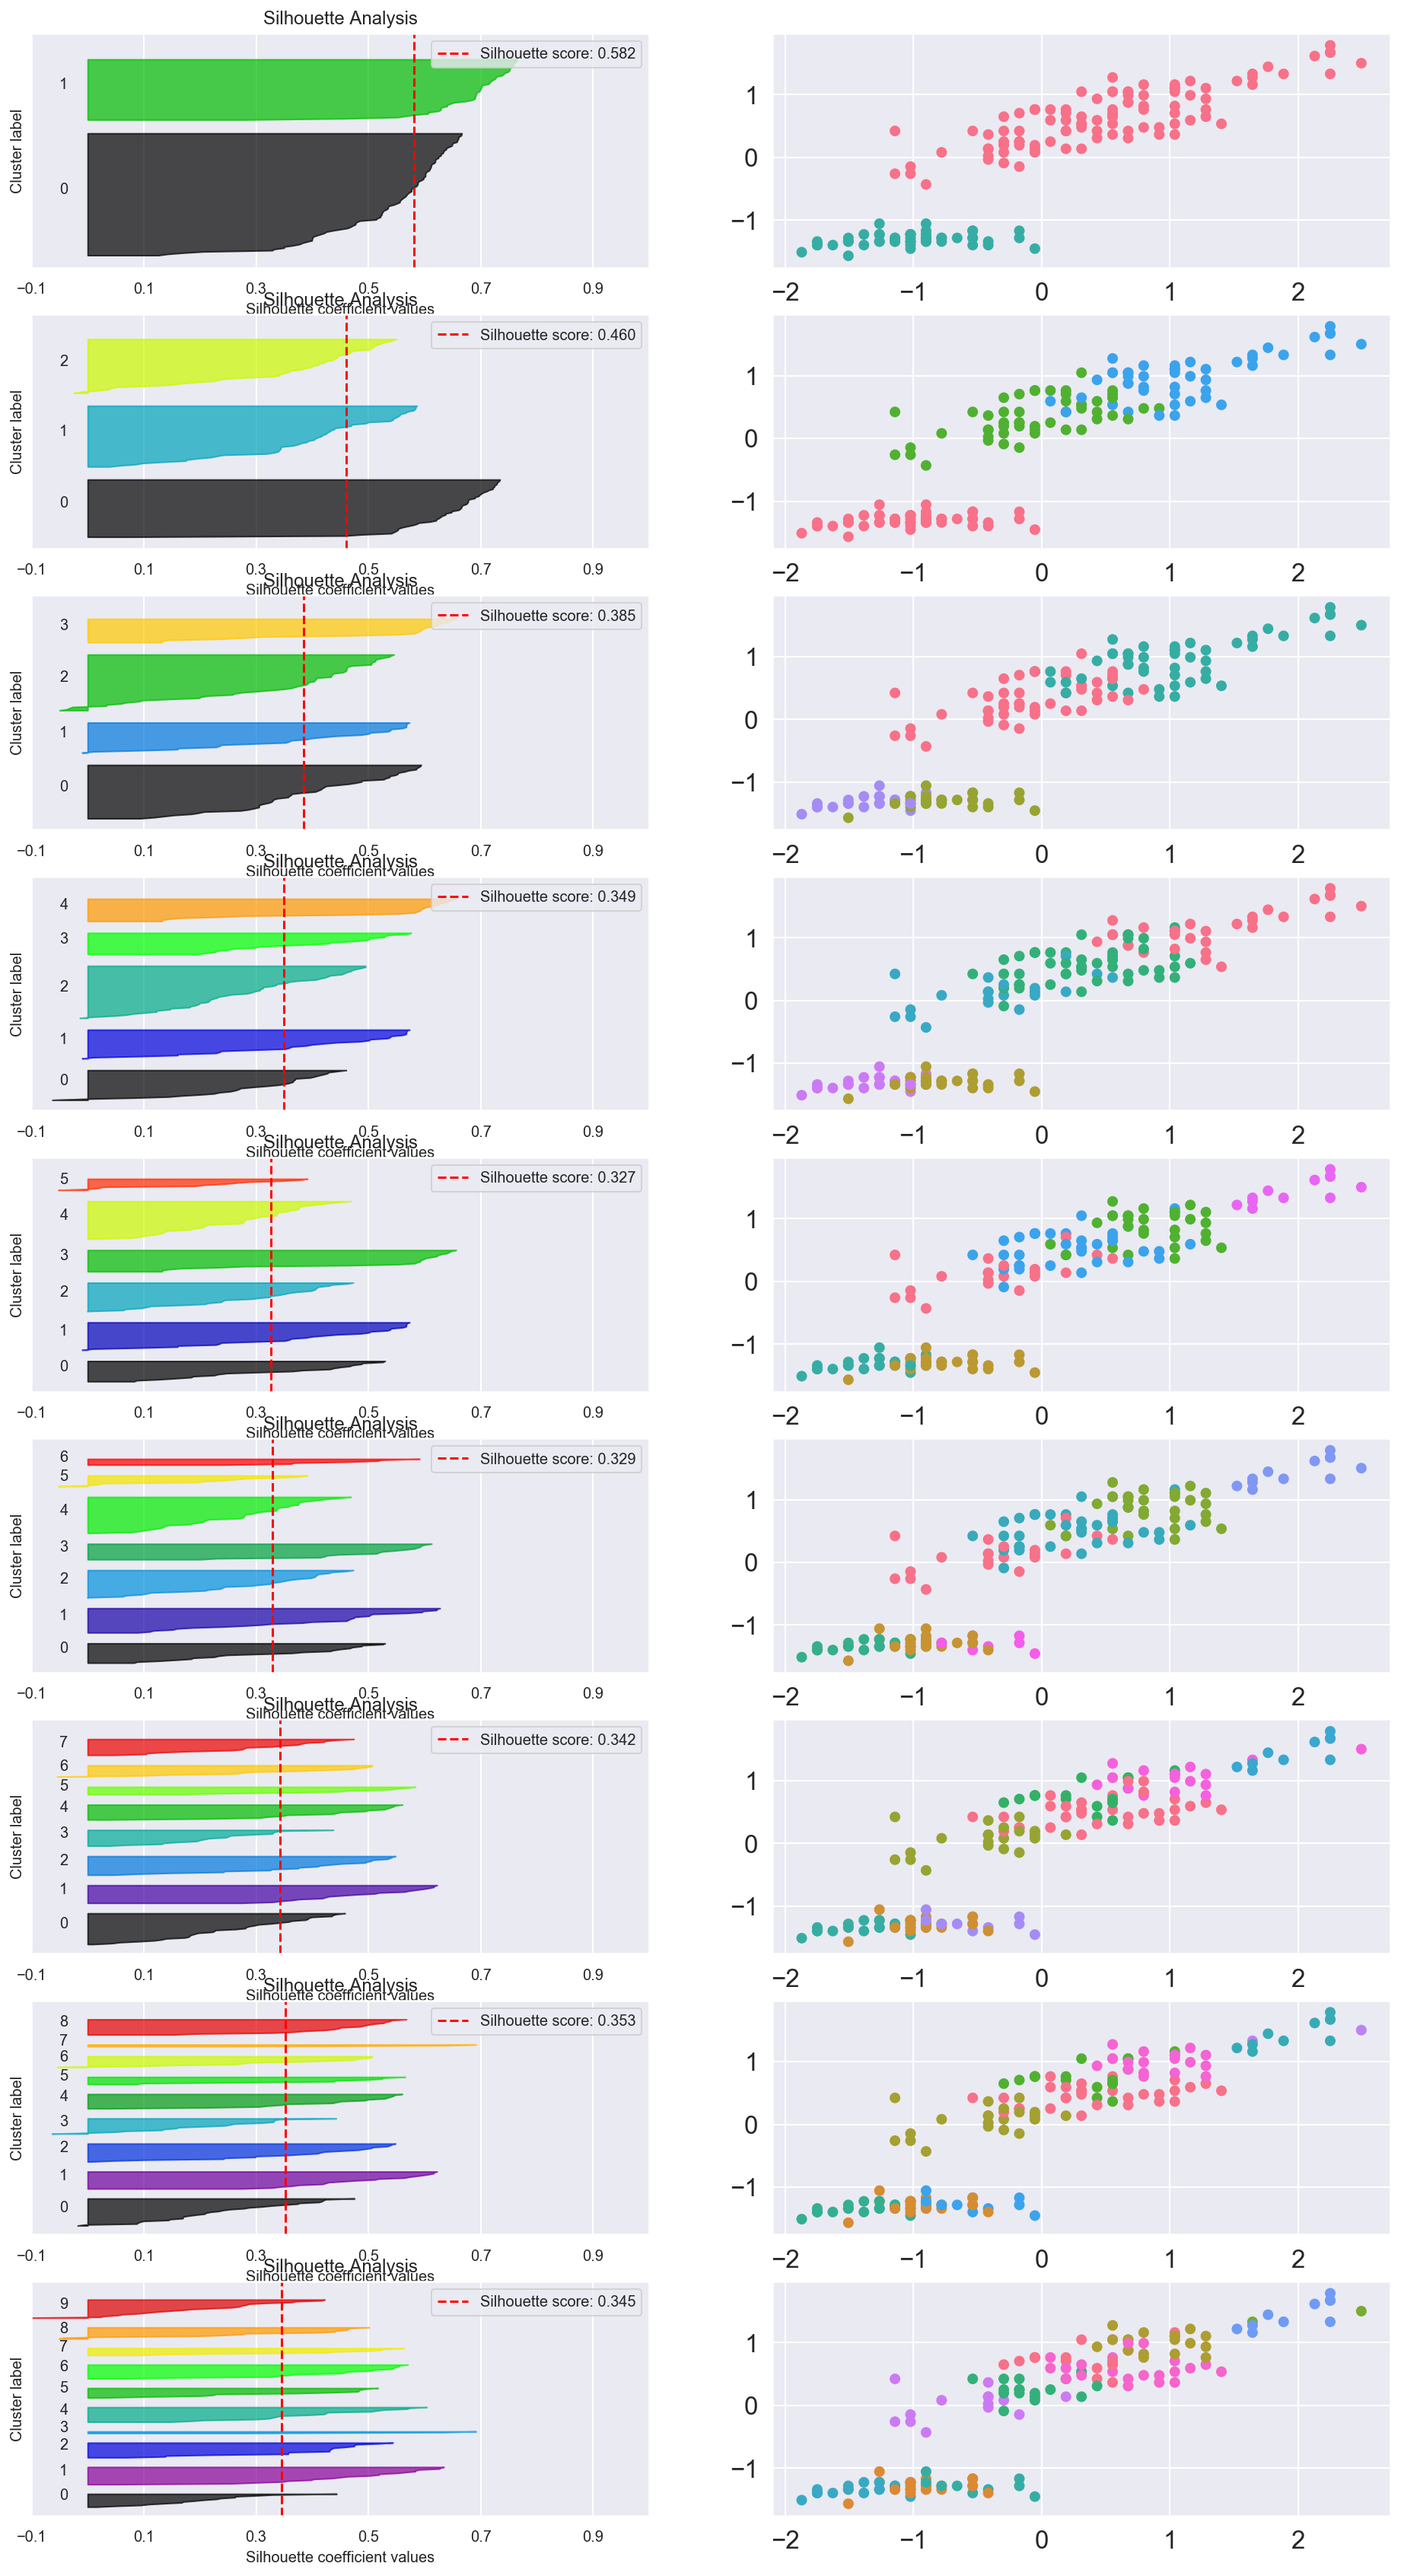

In [17]:
silhouette = []

fig, ax = plt.subplots(nrows=9, ncols=2, figsize=(16, 30))

for k in range(2, 11):

    model = KMeans(n_clusters=k, random_state=1)
    labels = model.fit_predict(Xstd)
    silhouette.append((k, silhouette_score(Xstd, labels)))

    cmap = ListedColormap(sns.color_palette("husl", n_colors=k))
    plot_silhouette(Xstd, labels, ax=ax[k-2, 0])
    ax[k-2, 1].scatter(Xstd.iloc[:, 0], Xstd.iloc[:, 2], color=cmap(labels))

silhouette = np.array(silhouette)

### Plot the inertia score for the different K clusters

Is there an "elbow" to select a good number of clusters or not?

Bonus: Do this by hand.

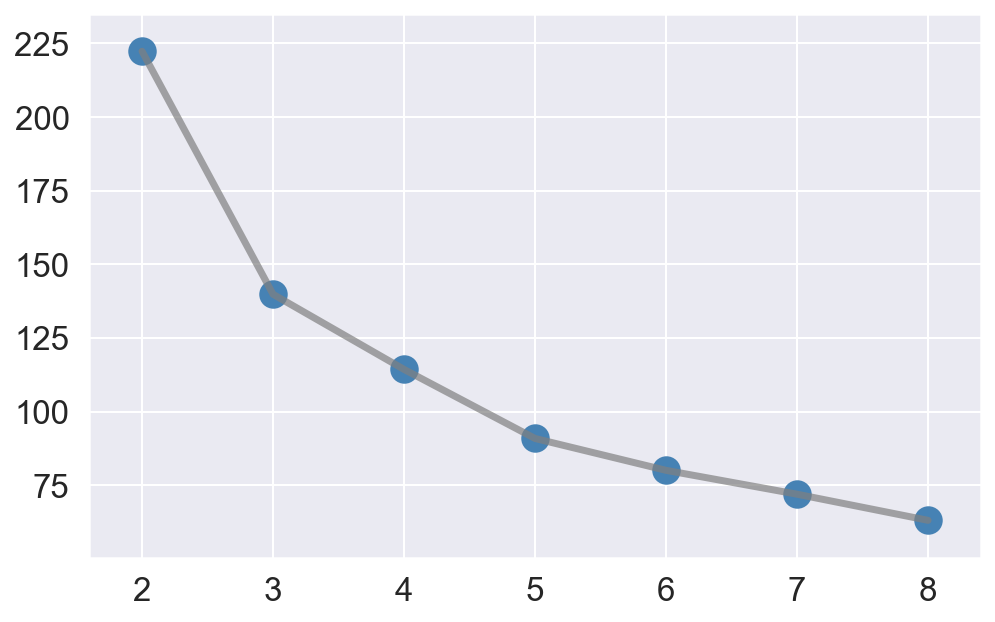

In [18]:
inertia = []
k_values = range(2, 9)
for k in k_values:
    km = KMeans(n_clusters=k)
    km.fit(Xstd)
    inertia.append(km.inertia_)

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(k_values, inertia, c='grey', lw=3.5, alpha=0.7)
ax.scatter(k_values, inertia, c='steelblue', s=175)
plt.show()

In [19]:
from scikitplot.cluster import plot_elbow_curve

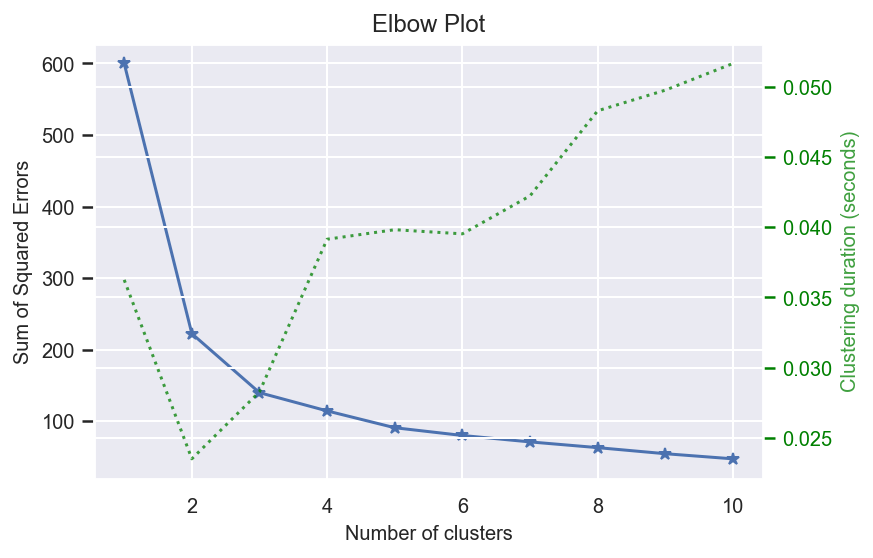

In [20]:
model = KMeans(n_clusters=3, random_state=1)

plot_elbow_curve(model, Xstd, cluster_ranges=range(1, 11))
plt.show()

### Fit K-Means with 3 clusters and pull out the cluster labels. Pull out the true labels as well.

Once you have both, adjust the predicted cluster labels to correspond to the true labels. For example, cluster 0 should correspond roughly to species 0, cluster 1 to species 1, and cluster 2 to species 2.

In [21]:
km3 = KMeans(n_clusters=3)
km3.fit(Xstd)

labels = km3.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [22]:
# 0 is obvious, 1 and 2 seem good enough

### Calculate the completeness, homogeneity and V measure scores comparing cluster and true labels

In [23]:
from sklearn.metrics import homogeneity_completeness_v_measure

In [24]:
homogeneity_completeness_v_measure(y, labels)

(0.6591265018049008, 0.6598476779627759, 0.659486892724918)